In [ ]:
import time
notebook_start_time = time.time()

**Importing Libraries**

In [ ]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

**Defining Paths**

In [ ]:
real_audio_path = r'C:\Users\vince\Documents\1. Fourth Year First Sem\Digital Signal Processing and Application\DSP Final Project\Audio-Dataset\Real-Audio'
fake_audio_path = r'C:\Users\vince\Documents\1. Fourth Year First Sem\Digital Signal Processing and Application\DSP Final Project\Audio-Dataset\Fake-Audio'

# Visualization

**Plot Raw Waveform**

In [ ]:
def plot_waveform(file_path, subplot_title):
    y, sr = librosa.load(file_path)
    plt.plot(y)
    plt.title(subplot_title)
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')

In [ ]:
real_samples = [os.path.join(real_audio_path, f) for f in os.listdir(real_audio_path)[:3]]
fake_samples = [os.path.join(fake_audio_path, f) for f in os.listdir(fake_audio_path)[:3]]

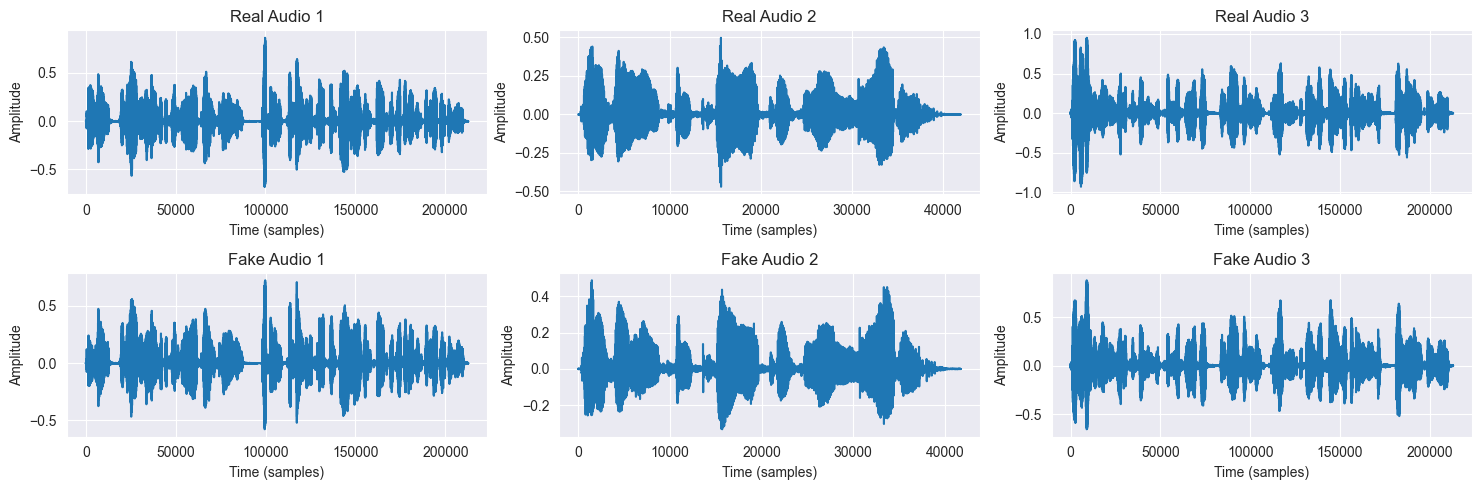

In [ ]:
plt.figure(figsize=(15, 5))

# Plotting real audio samples
for i, file_path in enumerate(real_samples, 1):
    plt.subplot(2, 3, i)
    plot_waveform(file_path, f'Real Audio {i}')

# Plotting fake audio samples
for i, file_path in enumerate(fake_samples, 4):
    plt.subplot(2, 3, i)
    plot_waveform(file_path, f'Fake Audio {i-3}')

plt.tight_layout()
plt.show()

**Plot Frequency Spectrum**

In [ ]:
def plot_frequency_spectrum(file_path, subplot_title, ax, n_fft=2048):
    y, sr = librosa.load(file_path)
    ft = np.abs(librosa.stft(y[:n_fft], hop_length=n_fft+1))
    ax.plot(ft)
    ax.set_title(subplot_title)
    ax.set_xlabel('Frequency Bin')
    ax.set_ylabel('Amplitude')

In [ ]:
real_samples = [os.path.join(real_audio_path, f) for f in os.listdir(real_audio_path)[:3]]
fake_samples = [os.path.join(fake_audio_path, f) for f in os.listdir(fake_audio_path)[:3]]

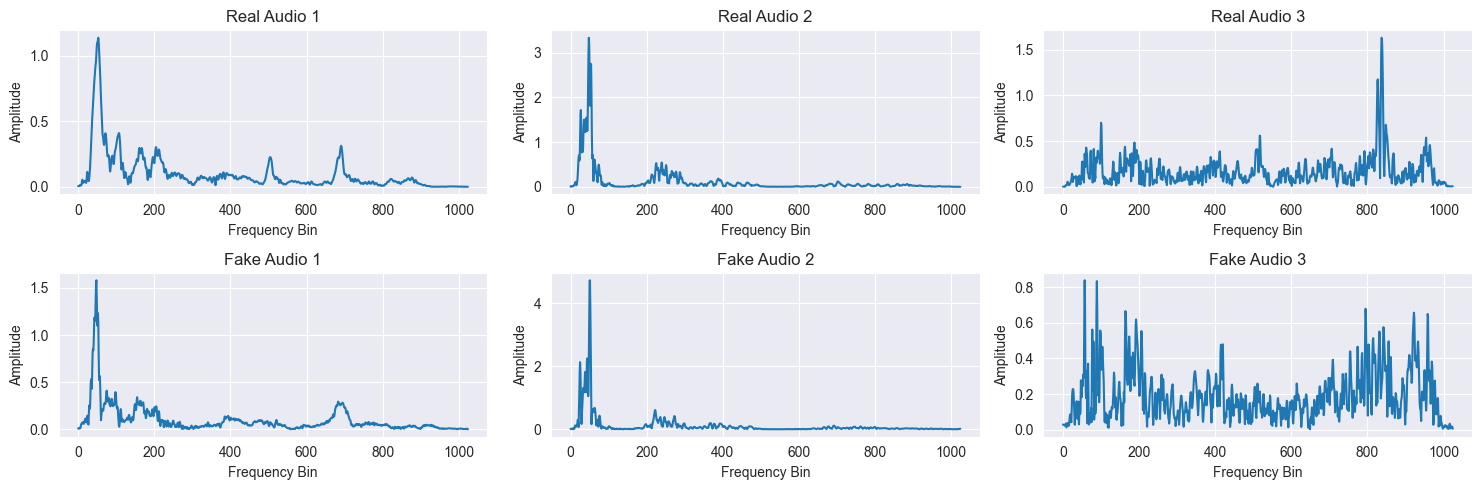

In [ ]:
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

# Plotting frequency spectrum for real audio samples
for i, file_path in enumerate(real_samples):
    plot_frequency_spectrum(file_path, f'Real Audio {i+1}', axes[0, i])

# Plotting frequency spectrum for fake audio samples
for i, file_path in enumerate(fake_samples):
    plot_frequency_spectrum(file_path, f'Fake Audio {i+1}', axes[1, i])

plt.tight_layout()
plt.show()

# Generate Mel Spectrogram Images

**Function for generating mel spectrogram images**

In [ ]:
def create_and_save_melspectrogram(audio_file, output_dir):
    y, sr = librosa.load(audio_file)
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Create a figure without axis and colorbar
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.axis('off')  # Remove axis
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust subplot edges

    # Filename for the output image
    output_filename = os.path.splitext(os.path.basename(audio_file))[0] + '.png'
    output_path = os.path.join(output_dir, output_filename)
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)  # Save without padding and border
    plt.close()

**Defining Output Path for Mel Spectrogram Images**

In [ ]:
# Directory for saving the Mel spectrogram images
output_base_dir = r'C:\Users\vince\Documents\1. Fourth Year First Sem\Digital Signal Processing and Application\DSP Final Project\Mel-Spectrogram-Images'
os.makedirs(output_base_dir, exist_ok=True)

In [ ]:
# Create separate folders for real and fake audio spectrograms
real_output_dir = os.path.join(output_base_dir, 'Real-Audios')
fake_output_dir = os.path.join(output_base_dir, 'Fake-Audios')
os.makedirs(real_output_dir, exist_ok=True)
os.makedirs(fake_output_dir, exist_ok=True)

**Generate Mel Spectrogram Images**

In [ ]:
# Process and save Mel spectrograms for real audios
for audio_file in os.listdir(real_audio_path):
    full_audio_path = os.path.join(real_audio_path, audio_file)
    create_and_save_melspectrogram(full_audio_path, real_output_dir)

In [ ]:
# Process and save Mel spectrograms for fake audios
for audio_file in os.listdir(fake_audio_path):
    full_audio_path = os.path.join(fake_audio_path, audio_file)
    create_and_save_melspectrogram(full_audio_path, fake_output_dir)

**Visualize Generated Mel Spectrogram Images**

In [ ]:
import matplotlib.image as mpimg

In [ ]:
real_folder = r'C:\Users\vince\Documents\1. Fourth Year First Sem\Digital Signal Processing and Application\DSP Final Project\Mel-Spectrogram-Images\Real-Audios'
fake_folder = r'C:\Users\vince\Documents\1. Fourth Year First Sem\Digital Signal Processing and Application\DSP Final Project\Mel-Spectrogram-Images\Fake-Audios'

In [ ]:
def plot_spectrograms(folder, title_prefix, axes):
    for i, filename in enumerate(sorted(os.listdir(folder))[:3]):
        if filename.endswith('.png'):  # Check if the file is an image
            file_path = os.path.join(folder, filename)
            img = mpimg.imread(file_path)
            axes[i].imshow(img)
            axes[i].set_title(f'{title_prefix} {i+1}')
            axes[i].axis('off')

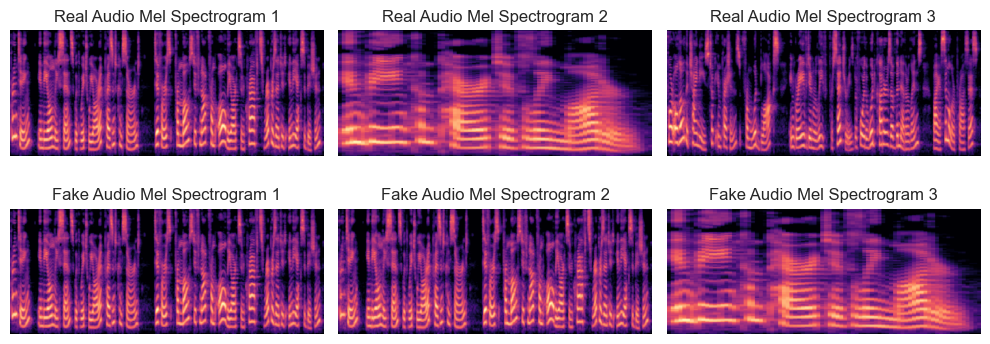

In [ ]:
# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(10, 4))  # 2 rows (real, fake), 3 columns

# Plot real spectrograms
plot_spectrograms(real_folder, 'Real Audio Mel Spectrogram', axes[0])

# Plot fake spectrograms
plot_spectrograms(fake_folder, 'Fake Audio Mel Spectrogram', axes[1])

plt.tight_layout()
plt.show()

In [ ]:
notebook_end_time = time.time()
notebook_total_run_time = notebook_end_time - notebook_start_time
minutes, seconds = divmod(int(notebook_total_run_time), 60)

print(f"Notebook Total Runtime: {minutes} minutes {seconds} seconds")

Notebook Total Runtime: 5 minutes 19 seconds


# Modeling

In [ ]:
# Import required modules
import os
import time
from IPython.display import clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
from sklearn.metrics import *

from keras.applications.vgg16 import VGG16
from keras.applications import VGG19
from keras.models import Sequential, load_model
from keras.layers import *
from keras.regularizers import L2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

clear_output(wait=True)
print('Modules imported.')


Modules imported.


In [ ]:
import splitfolders

In [ ]:
input_folder = r'C:\Users\vince\Documents\1. Fourth Year First Sem\Digital Signal Processing and Application\DSP Final Project\Mel-Spectrogram-Images'
output_folder = r'C:\Users\vince\Documents\1. Fourth Year First Sem\Digital Signal Processing and Application\DSP Final Project\Train-Val-Test'

In [ ]:
splitfolders.ratio(input_folder, output_folder, seed=42, ratio=(0.7, 0.2, 0.1))

In [ ]:
img_width = 256
img_height = 256
batch_size = 16

train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(r'C:\Users\vince\Documents\1. Fourth Year First Sem\Digital Signal Processing and Application\DSP Final Project\Train-Val-Test\train',
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(r'C:\Users\vince\Documents\1. Fourth Year First Sem\Digital Signal Processing and Application\DSP Final Project\Train-Val-Test\val',
                                                         target_size=(img_width, img_height),
                                                         batch_size=batch_size,
                                                         class_mode='binary',
                                                         subset='validation')

test_generator = test_datagen.flow_from_directory(r'C:\Users\vince\Documents\1. Fourth Year First Sem\Digital Signal Processing and Application\DSP Final Project\Train-Val-Test\test',
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='binary')

Found 1120 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
def plot_history(df_history):

    # Plot the model's training history
    scale=0.8
    fig, axes = plt.subplots(2, 1, figsize=(16*scale, 9*scale))

    x=range(1, df_history.shape[0]+1)

    # Loss History subplot
    sns.lineplot(data=df_history, x=x, y=df_history['loss'], linestyle='--', color='red', ax=axes[0])
    sns.lineplot(data=df_history, x=x, y=df_history['val_loss'], color='orange', ax=axes[0])
    axes[0].set_ylim([0, 3])

    # Accuracy History subplot
    sns.lineplot(data=df_history, x=x, y=df_history['accuracy'], linestyle='--', color='green', ax=axes[1])
    sns.lineplot(data=df_history, x=x, y=df_history['val_accuracy'], color='blue', ax=axes[1])
    axes[1].set_ylim([0.5, 1])

    # Add labels
    axes[0].set_title('Training Loss vs. Validation Loss')
    axes[0].legend(labels=['Training Loss', 'Validation Loss'], labelcolor=['red', 'orange'], loc='center left')
    axes[1].set_title('Training Loss vs. Validation Loss')
    axes[1].legend(labels=['Training Accuracy', 'Validation Accuracy'], labelcolor=['green', 'blue'], loc='center left')
    fig.supxlabel('epoch')
    fig.supylabel('metric value')
    plt.tight_layout()

    plt.show()


In [ ]:
# Create an empty DataFrame for storing training history metrics
df_history_model_vgg16 = pd.DataFrame(columns=['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

# Load the pre-trained VGG16 model
base_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze pre-trained layers
for layer in base_vgg16.layers:
    layer.trainable = False

# Create the model
model_vgg16 = Sequential([
    base_vgg16,

    Flatten(),
    Dense(1, activation='sigmoid')
])

model_vgg16.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Set up learning rate scheduler and early stopping
reducelronplateau = ReduceLROnPlateau(patience=3, monitor='val_loss', min_delta=0.001, factor=0.5, min_lr=0.0001, verbose=1)
earlystopping = EarlyStopping(patience=6, monitor='val_loss', min_delta=0.001, restore_best_weights=True, verbose=1)

# Train the model
start_time = time.time()

# Record the epoch history in a DataFrame.
history_model_vgg16 = model_vgg16.fit(train_generator, validation_data=validation_generator, epochs=10, callbacks=[earlystopping, reducelronplateau])
df_history_model_vgg16 = pd.concat([df_history_model_vgg16, pd.DataFrame(history_model_vgg16.history, columns=['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])])
df_history_model_vgg16.to_csv('df_history_model_vgg16.csv')

# # Save the model
model_vgg16.save('model_vgg16.h5')

end_time = time.time()
total_time = end_time - start_time
minutes, seconds = divmod(total_time, 60)
clear_output(wait=True)
print('Training finished. Total time elapsed: {} minutes and {:.2f} seconds.\n'.format(int(minutes), seconds))
print(df_history_model_vgg16.tail(10))
print('\nBest epoch:')
print(df_history_model_vgg16.iloc[earlystopping.best_epoch])


Training finished. Total time elapsed: 3 minutes and 30.08 seconds.

       loss  accuracy  val_loss  val_accuracy     lr
0  0.588401  0.698214  0.373215        0.9125  0.001
1  0.340594  0.870536  0.275760        0.9375  0.001
2  0.209676  0.962500  0.229961        0.9500  0.001
3  0.165117  0.983036  0.212867        0.9000  0.001
4  0.131205  0.983929  0.198956        0.9500  0.001
5  0.119066  0.983036  0.179508        0.9250  0.001
6  0.083041  0.995536  0.184988        0.9375  0.001
7  0.068134  0.997321  0.162235        0.9625  0.001
8  0.064819  0.993750  0.186409        0.9125  0.001
9  0.054699  0.998214  0.157862        0.9250  0.001

Best epoch:
loss            0.054699
accuracy        0.998214
val_loss        0.157862
val_accuracy    0.925000
lr              0.001000
Name: 9, dtype: float64


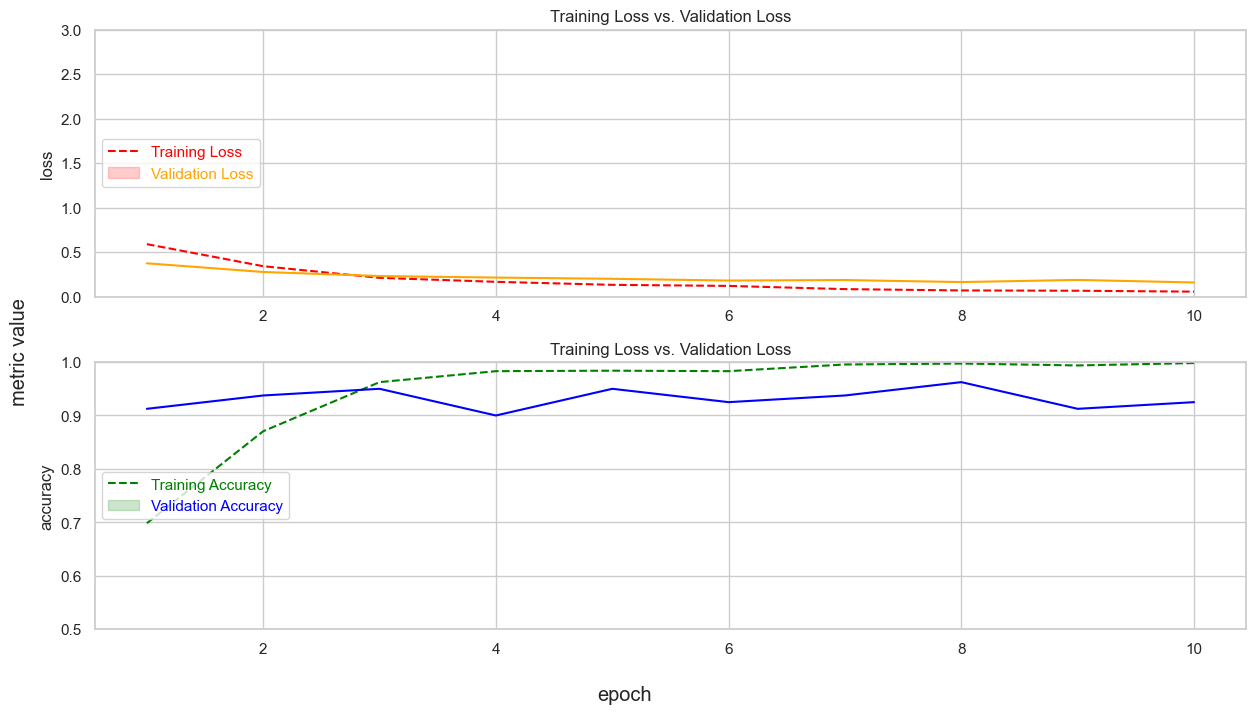

In [ ]:
plot_history(df_history_model_vgg16)


In [ ]:
# Evaluate the model
train_loss, train_accuracy = model_vgg16.evaluate(train_generator, steps=train_generator.samples // batch_size)

print(f'Train accuracy: {train_accuracy*100:.4f}%')

70/70 [==============================] - 8s 112ms/step - loss: 0.0452 - accuracy: 1.0000
Train accuracy: 100.0000%


In [ ]:
# Evaluate the model
test_loss, test_accuracy = model_vgg16.evaluate(test_generator, steps=test_generator.samples // batch_size)

print(f'Test accuracy: {test_accuracy*100:.4f}%')

12/12 [==============================] - 2s 114ms/step - loss: 0.0949 - accuracy: 0.9844
Test accuracy: 98.4375%


In [ ]:
# Predict classes
y_pred = model_vgg16.predict(test_generator)
y_pred = np.round(y_pred)

# Get the true class labels for the test images
y_true = test_generator.classes

13/13 [==============================] - 2s 136ms/step


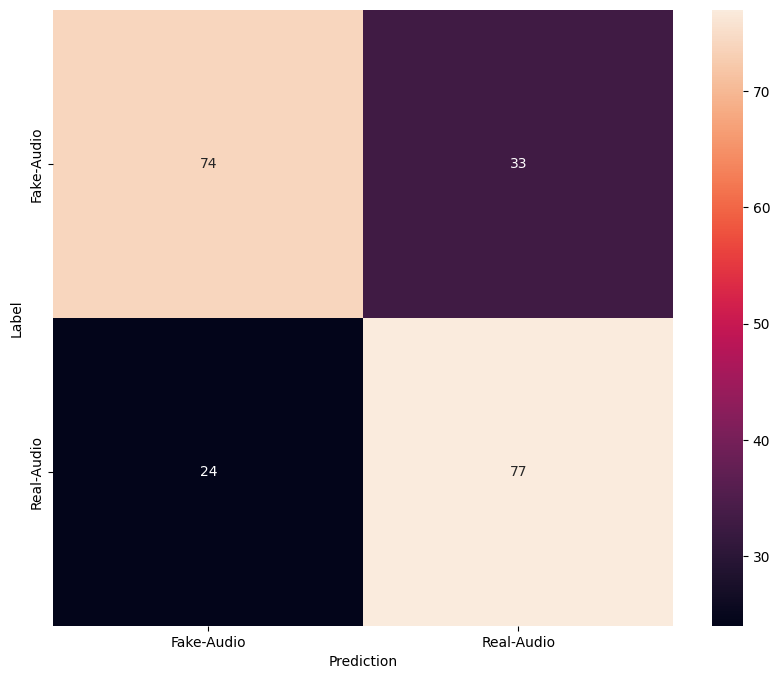

In [ ]:
from sklearn.metrics import *

label_names = ['Fake-Audio', 'Real-Audio']
confusion_mtx = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx,
            xticklabels=label_names,
            yticklabels=label_names,
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

<Axes: >

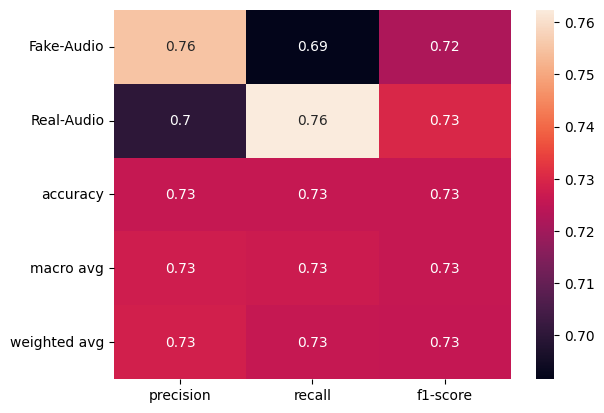

In [ ]:
import pandas as pd
import seaborn as sns

clf_report = classification_report(y_true,
                                   y_pred,
                                   labels=[0,1],
                                   target_names=label_names,
                                   output_dict=True)

# .iloc[:-1, :] to exclude support
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

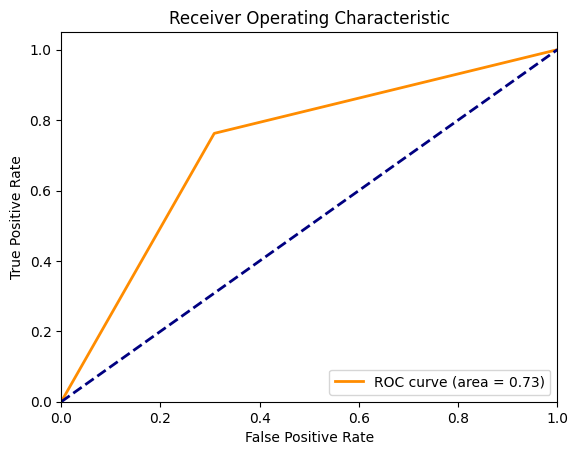

In [ ]:
# Calculating ROC AUC Score
roc_auc = roc_auc_score(y_true, y_pred)

# Calculating ROC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()